# Multi-Class Logistic Regression

In this notebook, I will use logistic regression to solve a multi-class classification problem. Since logistic regression is a binary clasification algorithm I will combine many of them to solve this problem.

The idea is to recognize hand written digits to be in (${0,1,2,3,4,5,6,7,8,9}$) So I will use 10 logistic regressions.

Let's import the necessary library and load the data used.

In [2]:
import scipy.io as sio
import numpy
from matplotlib import pyplot

data = sio.loadmat('ex3data1.mat')

Let's define a display function to see how the data looks like

In [3]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Displays 2D data stored in X in a nice grid.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(numpy.round(numpy.sqrt(n)))
    example_height = n / example_width

    # Compute number of items to display
    display_rows = int(numpy.floor(numpy.sqrt(m)))
    display_cols = int(numpy.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

    pyplot.show()

Let's separate the input from the output the data

In [4]:
X, Y = data['X'], data['y'].ravel()
Y[Y==10]=0

The size of the output Y is:

In [5]:
m=Y.size
print(m)

5000


Let's display the some data

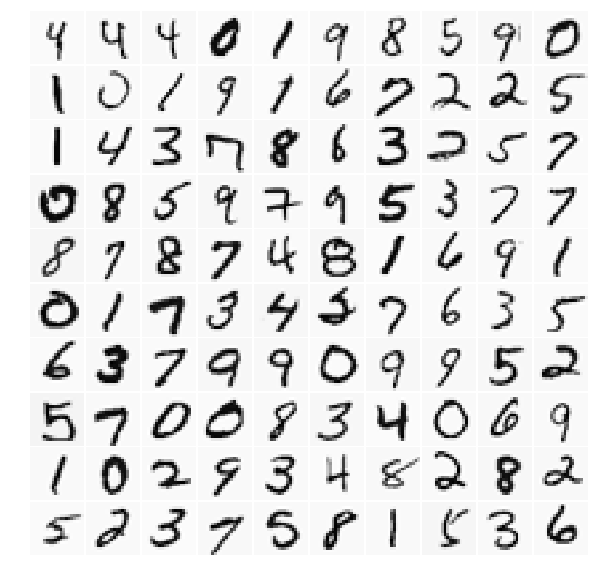

In [6]:
# Randomly select 100 data points to display
rand_indices = numpy.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

displayData(sel)

## Let's define the function we need for the algorithm

These are the same functions I have defined for the regularized version of the logistic regression 

In [7]:
def sigmoid(x):
	z = numpy.exp(-x)
	sigmoid = 1/(1+z)
	return sigmoid

def costFunction(X,Y,Theta,Lambda):
	h = sigmoid(X.dot(Theta))
	print(Y.shape)
	m = len(Y)
	term1 = Y*numpy.log(h)
	term2 = (1-Y)*numpy.log(1-h)
	J = (-1/m)*numpy.sum(term1+term2)
	Reg = numpy.sum(numpy.square(Theta))- (Theta[0]**2)
	J = J + (Lambda/(2*m))*Reg
	return J

def computeGradient(X,Y,Theta,Lambda):
	h = sigmoid(X.dot(Theta))
	m = len(Y)
	term = (h-Y)*X.transpose()
	grad = ((1/m)*numpy.sum(term,axis=1))
	Reg = (Lambda/m)*Theta
	Reg[0] = 0
	grad = grad + Reg
	return grad

def gradientDescent(X,Y,iterations,learning_rate,Theta,Lambda):
	i = 0
	error = []
	while i<iterations:
		gradient = computeGradient(X,Y,Theta,Lambda)
		Theta = Theta - learning_rate*gradient
		i += 1
	return Theta

Great, now we can proceed and build the algorithm
Let's define the number of labels which is the number of logistic regression we will use

In [8]:
K = 10 # The number of labels

Let's encode the output Y into a matric of K column for each column all the components are zero beside the position of the encoded number is equal to 1

In [9]:
Y_encoded = numpy.zeros((m,K))
for j in range(K):
	for i in range(m):
		if Y[i] == j:
			Y_encoded[i][j] = 1

Let's initialize Theta and add a colum of ones to X

In [10]:
X = numpy.c_[numpy.ones(len(Y)),X]

#Initialization of Theta
Theta = numpy.zeros((X.shape[1],K))

Let's define the hyperparameters

In [11]:
iterations = 1000 
learning_rate = 0.01
Lambda = 1

So as I said there going to be 10 logistic regression, each is responsible to recognize one specific number 

I'm going to use accuracy_score for the sklearn library, just to assess the performance of the algorithm

In [12]:
from sklearn.metrics import accuracy_score
Acc = []
for i in range(K):
	y = Y_encoded[:,i]
	theta = Theta[:,i]
	theta_opt = gradientDescent(X,y,iterations,learning_rate,theta,Lambda)
	Y_pred = numpy.round_(sigmoid(X.dot(theta_opt)))
	Acc.append(accuracy_score(Y_pred,y))
	Theta[:,i]=theta_opt

print(Acc)

[0.9778, 0.9802, 0.9414, 0.9458, 0.9474, 0.9078, 0.9662, 0.964, 0.9128, 0.9072]


In [13]:
#The mean performance is:

# importing mean() 
from statistics import mean 

print(mean(Acc))

0.94506
